In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
from tensorflow.keras.utils import img_to_array, load_img
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import os

# Carga escalado, resize y aumento de los datos

 Asignación de las rutas y cargar las imagenes de los datasets desde directorios de train y test

In [42]:
# Rutas
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Preprocesamiento + aumento de datos para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalización
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,    
    horizontal_flip=True,
    brightness_range=[0.5, 1.2],
    validation_split=0.10
)



# Carga de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Solo normalización para test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4009 images belonging to 6 classes.
Found 442 images belonging to 6 classes.
Found 945 images belonging to 6 classes.


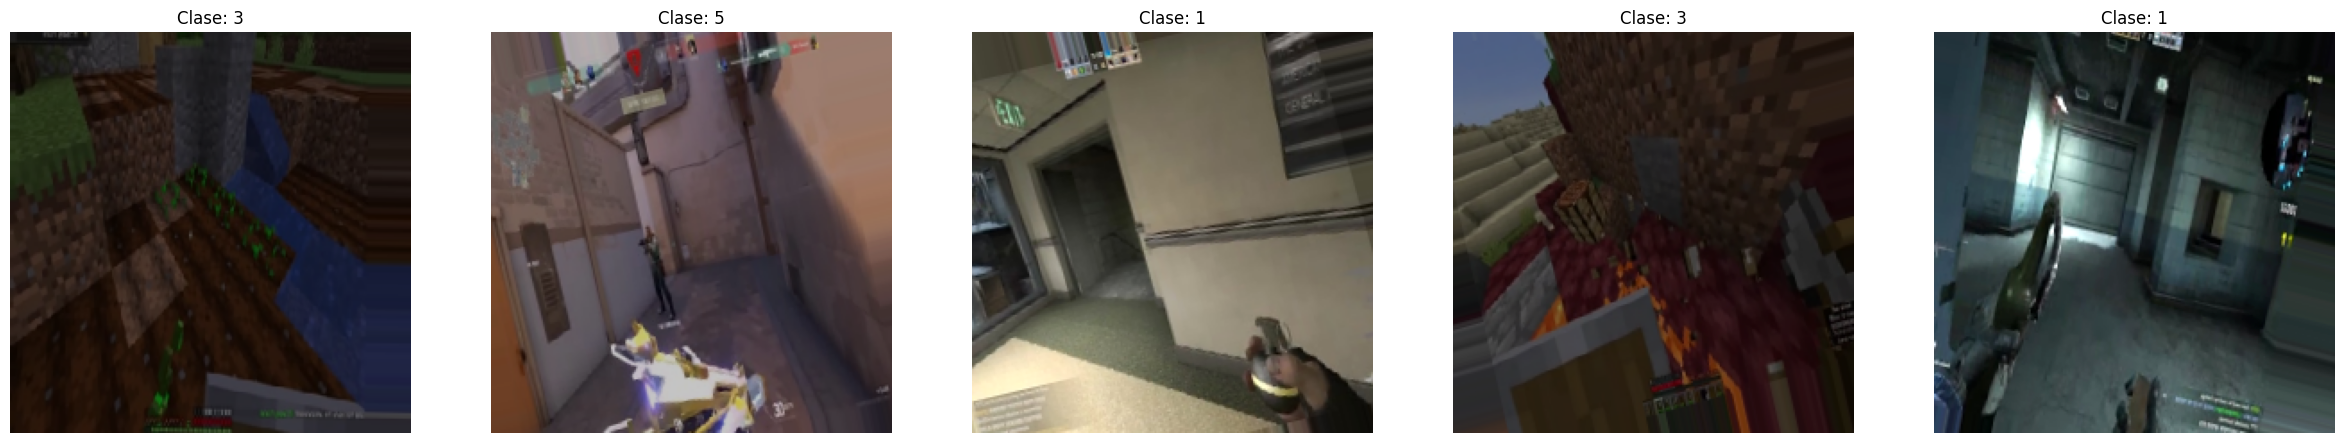

In [43]:
# Visualizar imágenes del primer batch
f, axarr = plt.subplots(1, 5, figsize=(30, 8))
images, labels = train_generator[0]

for i in range(5):
    axarr[i].imshow(images[i])
    axarr[i].set_title(f"Clase: {tf.argmax(labels[i]).numpy()}")
    axarr[i].axis("off")
plt.show()

#  Arquitectura CNN


In [ ]:
model = models.Sequential([
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

   
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

   
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.5),                 # ayuda contra overfitting
    layers.Dense(6, activation='softmax')  # 6 clases → softmax
])


c:\Users\leo9r\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
)


c:\Users\leo9r\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.3819 - loss: 1.6614 - val_accuracy: 0.6403 - val_loss: 1.0778
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 390s 3s/step - accuracy: 0.8074 - loss: 0.5678 - val_accuracy: 0.8145 - val_loss: 0.6552
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 377s 3s/step - accuracy: 0.8726 - loss: 0.3951 - val_accuracy: 0.7647 - val_loss: 0.7705
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.9048 - loss: 0.2857 - val_accuracy: 0.8643 - val_loss: 0.4466
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9356 - loss: 0.2094 - val_accuracy: 0.8575 - val_loss: 0.4789


In [47]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Accuracy en test: {test_acc}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9144 - loss: 0.2654
Accuracy en test: 0.8603174686431885


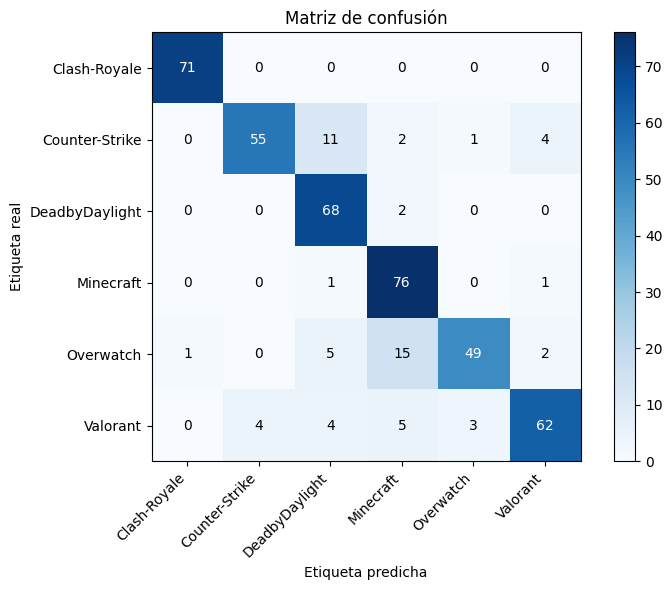

In [ ]:
pred_probs = model.predict(val_generator, verbose=0)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
tick_marks = np.arange(len(val_generator.class_indices))
plt.xticks(tick_marks, val_generator.class_indices.keys(), rotation=45, ha='right')
plt.yticks(tick_marks, val_generator.class_indices.keys())
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()
